# MNIST

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [3]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "ReLU" in path:
            try:
                data["Slope"] = float(path.split("ReLU")[1][:4])
            except:
                data["Slope"] = float(path.split("ReLU")[1][:3])
        else:
            data["Slope"] = 0.0
            
        if "fedavg-G00-B0" in path:
            data["Mode"] = "G00"
        # elif "LN11+G10" in path:
        #     data["Mode"] = "LN11+G10"
        # elif "LN11+G00" in path:
        #     data["Mode"] = "LN11+G00"
        elif "LN00+G00" in path:
            data["Mode"] = "LN00+G00"
        elif "BN00+G00" in path:
            data["Mode"] = "BN00+G00"
        elif "BN00+G00" in path:
            data["Mode"] = "BN00+G00"
        elif "BN00+G01" in path:
            data["Mode"] = "BN00+G01"
        else:
            continue
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

In [4]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-fedavg-0223*BN*-P0.*/s[1-9].csv"
    path_list = glob.glob(save_path)
    save_path = "../Output/CIFAR100-fedavg-0224*BN*-P0.*/s[1-9].csv"
    path_list += glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    print(data_temp["Mode"].unique())
    return data_temp

['BN00+G00' 'BN00+G01']
(2700, 22)
(1200, 22)


/tmp/ipykernel_924132/117978239.py:12: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Slope", style = "Mode", errorbar="sd", palette=sns.color_palette("tab10"))


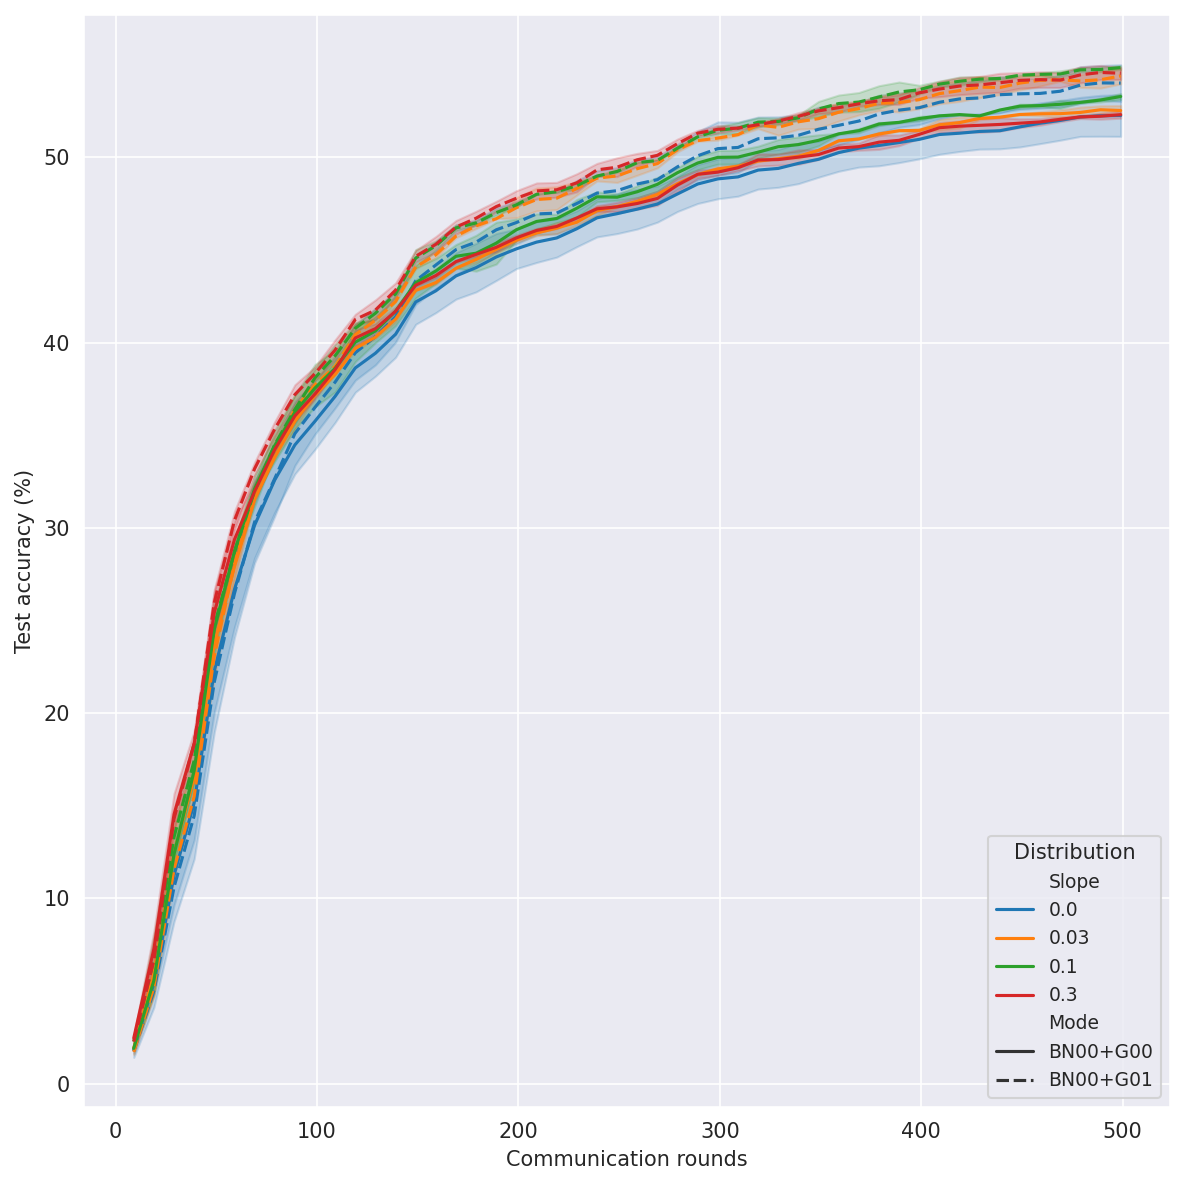

In [11]:
data_temp = load_data()
print(data_temp.shape)
fig, axes = plt.subplots(1, 1, figsize=(8,8), dpi=150, sharey=True)
sns.set_style("darkgrid")
ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] <= 499]
temp = temp[(temp["Slope"] == 0.0) | (temp["Slope"] == 0.1) | (temp["Slope"] == 0.03) | (temp["Slope"] == 0.3)]
print(temp.shape)

ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Slope", style = "Mode", errorbar="sd", palette=sns.color_palette("tab10"))
ax = axes
ax.set_xlabel("Communication rounds"), ax.set_ylabel("Test accuracy (%)"), 
axes.legend(title="Distribution", loc=4, prop={'size': 9}),
fig.tight_layout()